# EDA

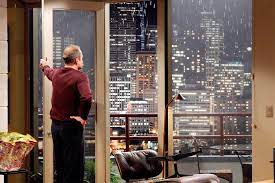

### Preparation and Libraries to Import for the Project 

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Introduction

## Stakeholder

### Zachary Brooks - Seller
### Invests in historical houses, best neighborhoods, high profits, best timing within a year, should renovate?

## Requirements of the Stakeholder
    - Invests in historical houses (define historical with Building Year (Renovated???))
    - best neighborhoods (what defines a good neighborhood?, prices, grade, size, distance to city center??)
    - high profits (where are the profit margins high? City Center/ renovated?, price)
    - best timing within a year (sample group of historical houses, and bar plot over date)
    - Should renovate? (how does renovating affect the house price? Of course it rises, but does it rise high enough, that it would be reasonable to renovate them)


# Hypothesis (Seller perspective - Zachary Brooks)
### 1. Historical Houses Premium Hypothesis:
Historical houses were the first which were build into the city, therefore they are mostly central and have premium prices due to the low distance to the city center
Most of them could be in a bad condition because of their age

### 2. Seasonal Timing for Maximum Profit Hypothesis:
The price and demand of historical houses (amount of sales), fluctuates throughout the seasons of the year 

    

### 3. Renovation Impact on Profitability Hypothesis
Renovations let the house price skyrocket - especially when they were old houses in good neighborhoods (profability over renovation costs, is it worth to renovate)



# Data Manipulation Section 


In [2]:
# read the csv for Data Manipulation 
df = pd.read_csv("data/eda.csv")

### Looks like some columns have a lack of data, we have a closer look at them and try to handle them

<Axes: >

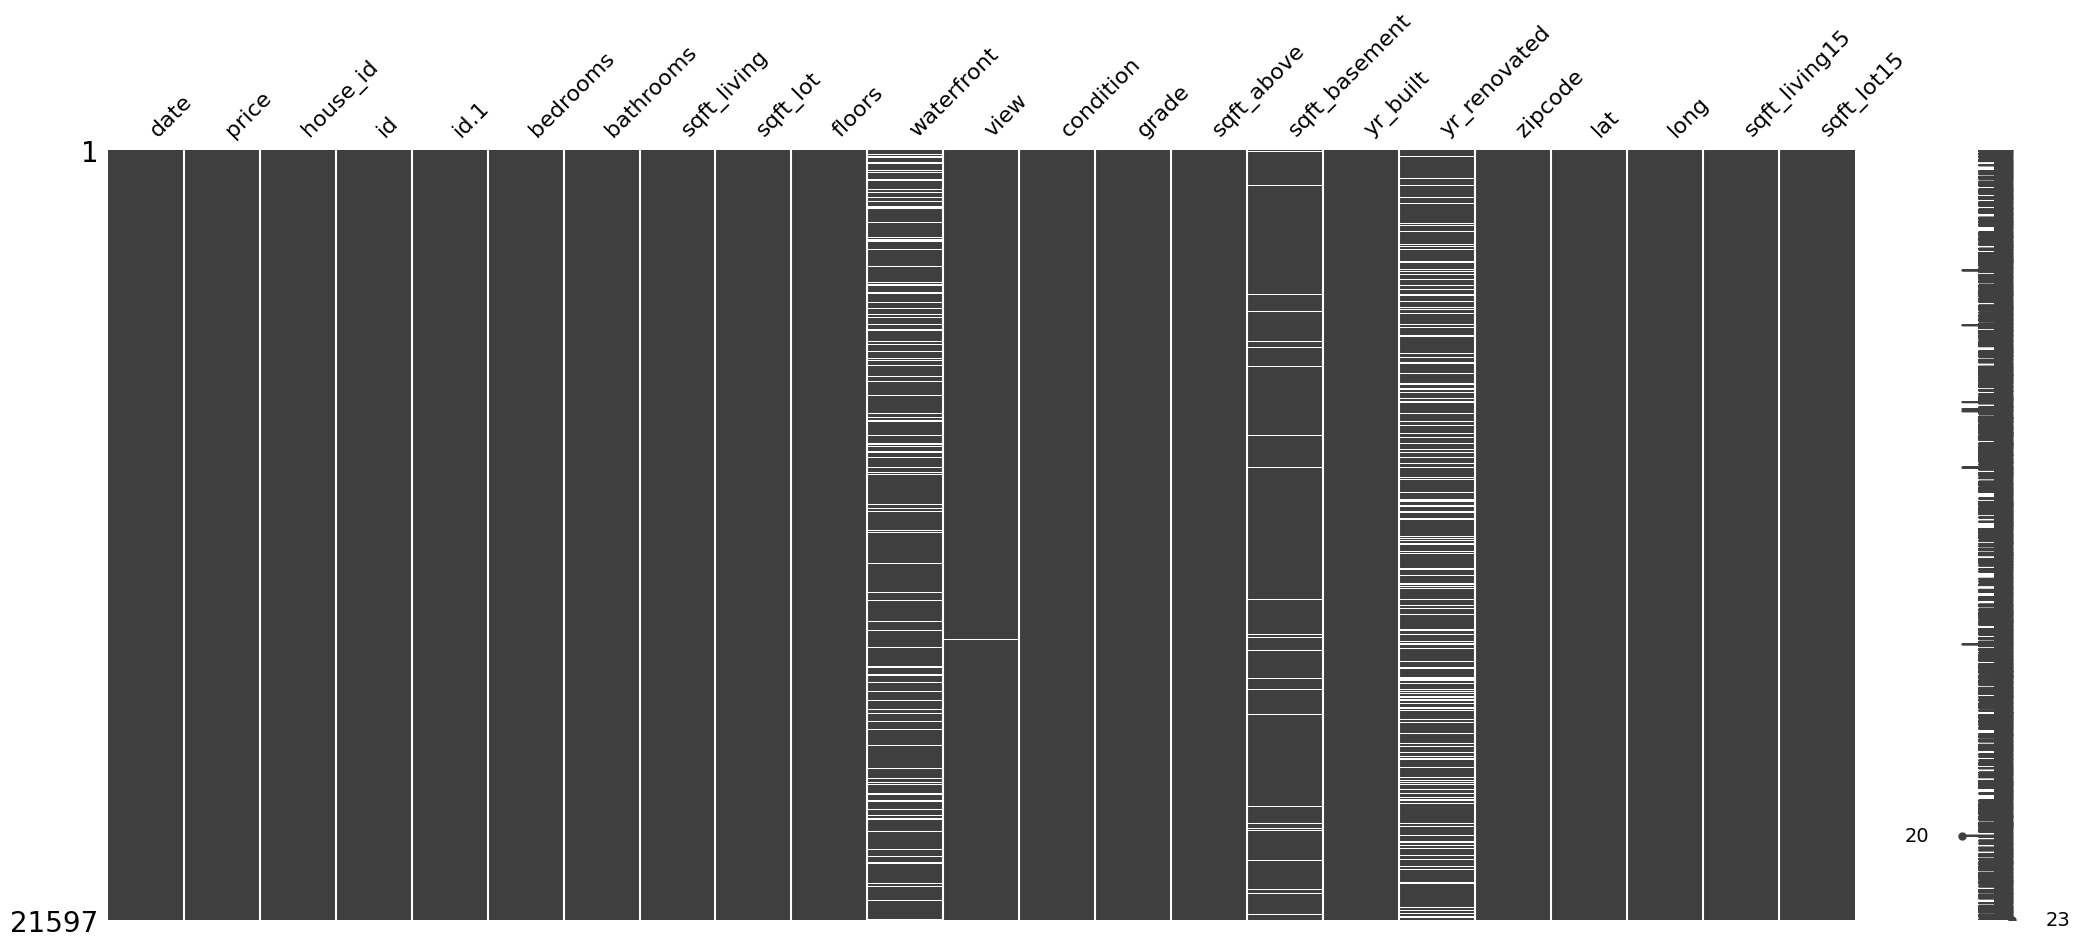

In [3]:
## Lets have a closer look at a graph of the Data Distribution and nan values 
msno.matrix(df)

In [4]:

# looking for columns with nan values + amount of them and get a first idea which columns should have a closer look and how to handle those values 
df.isna().sum()

date                0
price               0
house_id            0
id                  0
id.1                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# get an overview over the data frame for gathering further necessary data manipulation insights
df.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [6]:
# look at the Dtype of each column and have a quick look if its right -  column date seems to have a false data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

## Short List of what we want to clean and do with the DataFrame based on our observations

- drop the columns "id" and "id.1", id1 is same as house_id and id seems to be an index column within the dataframe
- change the date Dtype from an object to date type 
- year renovated seems to have a lot of nan or missing values with 0.0 , we asume 0.0 and nan means they have never been renovated, we will fix this column as we rely on it for the hypothesis
- add another column to the Data Frame with bool value "renovated" it helps us to split the dataset in renovated and not renovated houses later
- the squarefeet basement column misses some values too, we can calculate it by substract sqft_above from sqft_living to get the sqft_basement, we fill in the missing values
- we assume that when in waterfront column there is a nan or a 0 it means there is no waterfront available - nan just means there was no entry in the previous csv which equals to "no waterfront"
- the view column is only missing some values we will have a closer look at them and decide in the process what to do with them

In [7]:
# drop the id column we already have an index and the id.1 column because house_id holds the same data
df = df.drop(["id", "id.1"], axis= 1 )

# change the date in date column from string to pd.datetime 
df["date"] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Fill all nan with placeholder values to perform some methods
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Add new Column which indicates if a house has been renovated or not (bool True - False)
df["renovated"] = df["yr_renovated"].apply(lambda x:x != 0.0)

# cast true to 1 and false to 0 to make  the use as categorial variable more easier
df['renovated'] = df['renovated'].replace({True: 1, False: 0})

# cast yr_renovated to integer datatype from float and divide by 10 to get the right format
df["yr_renovated"] = (df["yr_renovated"] / 10).round(0).astype(int)

#fill the sqft_basement column with self calculated values 
df["sqft_basement"] = df["sqft_living"] - df["sqft_above"]

# fix the waterfront column - we assume nan or 0 means no waterfront for this house - we fill them with 0 for better use and cast it to an int
df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'] = df['waterfront'].astype(int)

# the view column is missing only some values for the columns. 63 out of over 21500 despite we wont use this variable much, we count the appearances of each value in this column and assign 
# the most common value to this 63 columns 

"""
view_counts = df['view'].value_counts()
print(view_counts)

view
0.000    19422
2.000      957
3.000      508
1.000      330
4.000      317
Name: count, dtype: int64
    """
# as view = 0 is by far the most common we assign 0 to the 63 nan columns 
df["view"] = df["view"].fillna(0)



### Lets see how our Data Manipulation worked 

Well this looks like a clean df for me - In normal Business perspective u would talk to your stakeholder to get information about nan or to get more data. For example a criminal statistic for each zipcode to identify which neighborhoods are the safest. 

But we only have the short description and profile of our Stakeholder, so in this example i assumed and commented in the code, what i expect for each value to be instead of dropping the rows with nans

<Axes: >

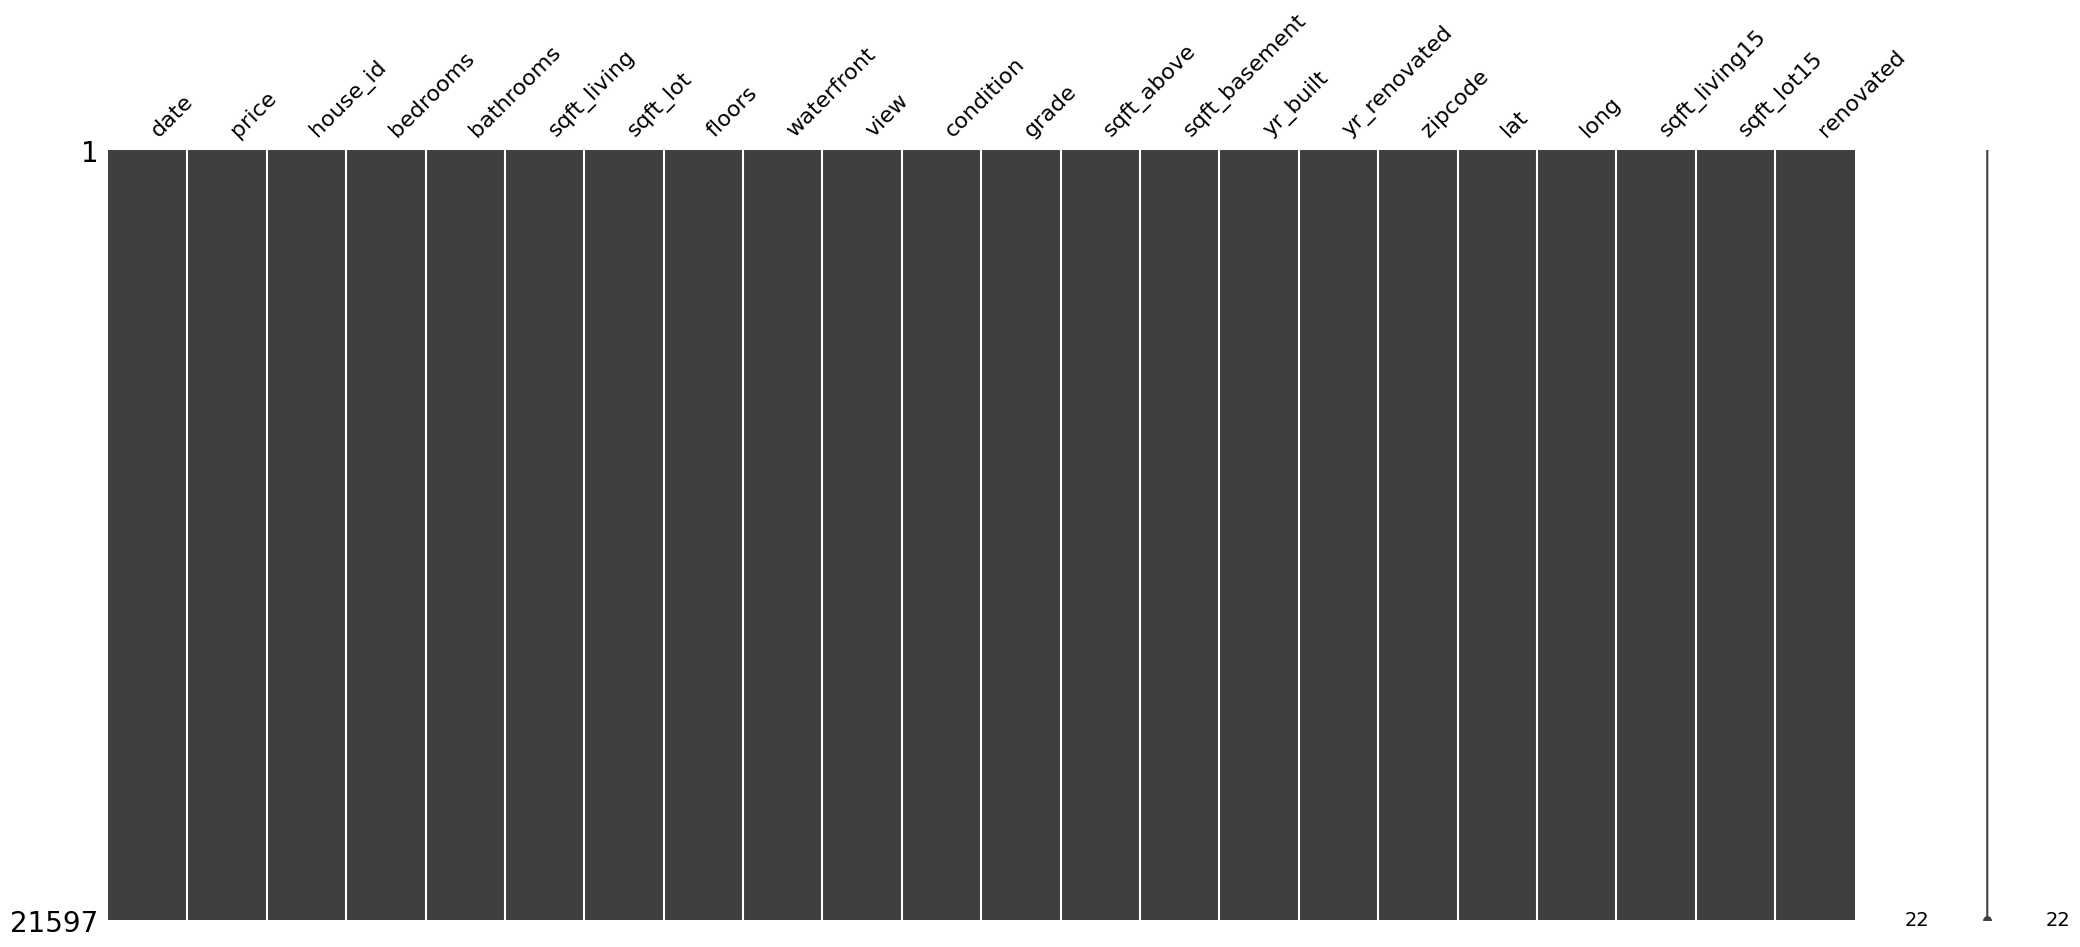

In [8]:
msno.matrix(df)



### Plotting and Visual Hypothesis testing

# For this section we create some slices out of our original Dataframe to meet the stakeholders requirements 

Since our Stakeholder is specialised on historic houses, we have to define what a "historic_house" is. 
For this we have a closer look at the year they were built

Look at the Code below - We say historic_houses are everything built before 1951 (first quartile)  (5184 rows out of 21597)

In [9]:
# checking the quartiles of the dataframe to help us to make a decision what we would assume as a historical house
# We take the first Quartile as a measure of historic houses so everything < 1951 will count as historic. or in other words house built in 1950 or before are in the historic category

df["yr_built"].describe()

count   21597.000
mean     1971.000
std        29.375
min      1900.000
25%      1951.000
50%      1975.000
75%      1997.000
max      2015.000
Name: yr_built, dtype: float64

In [10]:
# lets count how many rows we have left after our decision (normally its not good to cut the dataset into too small pieces - the more data the more precise your predictions)
# as we took the first quartile as a measure i assume we have around 21597/4 = rows left, if the sum of houses that were sold new every year was nearly even 
#5184 rows left - or 5184 historic houses to work with 

df[df['yr_built'] < 1951]['yr_built'].count()

5184

### We have 5184 rows left of historic houses, which we defined were built before 1951 - we will use them later for some plots

### First lets isolate all houses built before 1951 in a new Dataframe and try to visualize simple plots

In [11]:
# creating a slice of the old Dataframe this one holds all historic houses

df_historical = df.query("yr_built < 1951")

### Now Lets Plot it on a GeoMap and get a feeling for, where our historical houses are and when they were built 


In [12]:
#Geoplot with some Features and Styling. We want to see if historical houses are distributed evenly on the map

fig = px.scatter_mapbox(
    df_historical,
    lat='lat',
    lon='long',
    zoom=8,
    mapbox_style='open-street-map', 
    color='yr_built',
    hover_name='yr_built',
    hover_data={"price": True, 
                "yr_built": True,
                "renovated": True,
                "long": False,
                "lat": False},
    template='plotly_dark'
)

# updates marrkers and tooltips
fig.update_traces(
    hovertemplate ='<b>Price:</b> $' + df_historical.price.round(0).astype('str') + '<br>' +
                   '<b>Year Built:</b> ' + df_historical.yr_built.astype('str') + '<br>' +
                   '<b>Renovated:</b> ' + df_historical.renovated.map({0: "Never Renovated", 1: "Renovated"})
)

# updating height, width, margins and other layout properties
fig.update_layout(
    width=700,
    height=500,
    title_font_size=24,
    margin=dict(l=0, r=0, t=60, b=0),  # Set margins to zero (pixels)
    title={
        'text': "Historical Houses in King County built before 1951",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
# Show the plot

### Knowledge and Assumptions from the Geo Plot

- Most of the historic Houses are in the City Center
- if you use the year built legend, you can see, where the town began to spread and grow throughout the 19th century
- Some lonely historic houses are outside the town center, we can assume this were early farms to provide the town with food and therefore have a big sized lot
- The City Center is the place in most towns, where you have to pay a premium to live there

### Lets Tackle the first Hypothesis - we take Nr. 2 
### 2. Seasonal Timing for Maximum Profit Hypothesis:
The price and demand of historical houses (amount of sales), fluctuates throughout the seasons of the year 

As we have a df_historical and a df we plot them both to see, if there is a season for historic houses in the data for selling at a maximum profit


In [13]:

# add a month_year_week column to both DF to get a better visualisation at the end
# Dataframe holds only few year of Data, so i display sales per week, to have some datapoints on my plots
df_historical["month_year_week"] = df_historical["date"].dt.strftime("%Y-%m-%U")
df["month_year_week"] = df["date"].dt.strftime("%Y-%m-%U")

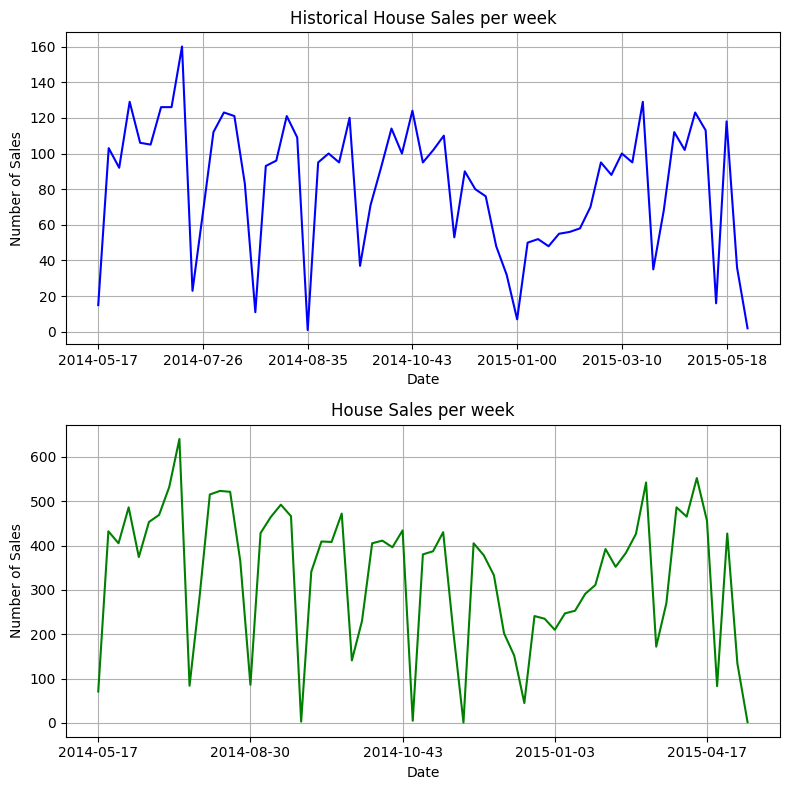

In [14]:
# Sales per week for df_historical
sales_per_month1 = df_historical.groupby("month_year_week").size()

# Sales per week for df
sales_per_month2 = df.groupby("month_year_week").size()

# Creating subplots
fig, axs = plt.subplots(2, figsize=(8, 8))

# Plotting for df_historical
axs[0].plot(sales_per_month1, color='blue')
axs[0].set_title('Historical House Sales per week')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Sales')
axs[0].grid(True)

# Setting x-axis ticks for the first plot
axs[0].xaxis.set_major_locator(plt.MaxNLocator(7))  # Adjust the number of ticks as needed

# Plotting for df
axs[1].plot(sales_per_month2, color='green')
axs[1].set_title('House Sales per week')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Sales')
axs[1].grid(True)

# Setting x-axis ticks for the second plot
axs[1].xaxis.set_major_locator(plt.MaxNLocator(7))  # Adjust the number of ticks as needed

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Text(0.5, 1.0, 'Amount of Historical House Sales and Mean House Prices')

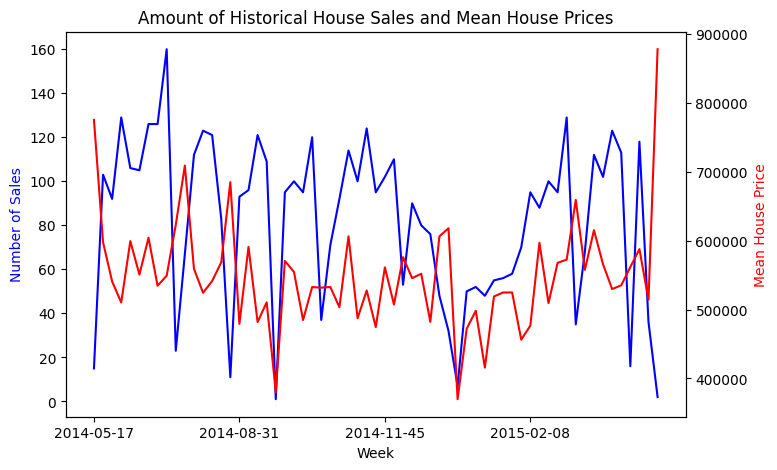

In [15]:
# The Sales per Week of Historical Houses and the Mean Sales prices


# Sales per week
sales_per_week = df_historical.groupby("month_year_week")["price"].count()

# mean house price per week
mean_price_per_week = df_historical.groupby("month_year_week")["price"].mean()

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot sales per week
ax1.plot(sales_per_week.index, sales_per_week.values, color='b')
ax1.set_xlabel('Week')
ax1.set_ylabel('Number of Sales', color='b')

ax1.set_xticks(ax1.get_xticks()[::4])

# Create a second y-axis for house prices
ax2 = ax1.twinx()
ax2.plot(mean_price_per_week.index, mean_price_per_week.values, color='r')
ax2.set_ylabel('Mean House Price', color='r')
ax2.set_xticks(ax1.get_xticks()[::4])

#Set title
plt.title("Amount of Historical House Sales and Mean House Prices")

### Hypothesis 2 - There is no Seasonality in House Sales for Historic Houses 

House Prices of Historical Houses seem to Rise after weeks of high sales of houses built before 1951 - If you want to try to time this near time window
your could define an average or mean house sold count of historical houses per month and always sell few weeks after when the last weeks were high above the average or mean

It let us also state, in weeks were less historical houses were sold, the prices got up. 
We could expect, that after a week were much historic houses were sold to a reasonable price, the weeks after that less historic houses are on the market and their price increases.

If you could sell the house at anytime, the perfect timeframe would be the weeks after we saw a record in historic house sales, because not many kinds of this objects are on the market anymore and therefore the price rises.

- We see a little outlier around the 44 Week in 2014 (October) (1 Plot: House Sales without prices)
- But there is no Seasonality in the amount of historic house sales compared to normal house sales
- With a bigger Dataset over multiple decades we would have more precise results. But we work with what we have :) 

In [16]:
#as we work strong with Categorial Variables - we want to make a quantitative analyse on them to figure out if some categories are predominant and if there are any insights from them

# create a features list out of some categorial Variables we want to have a closer look

categorical_features = ["yr_built", "renovated", "condition", "grade"]


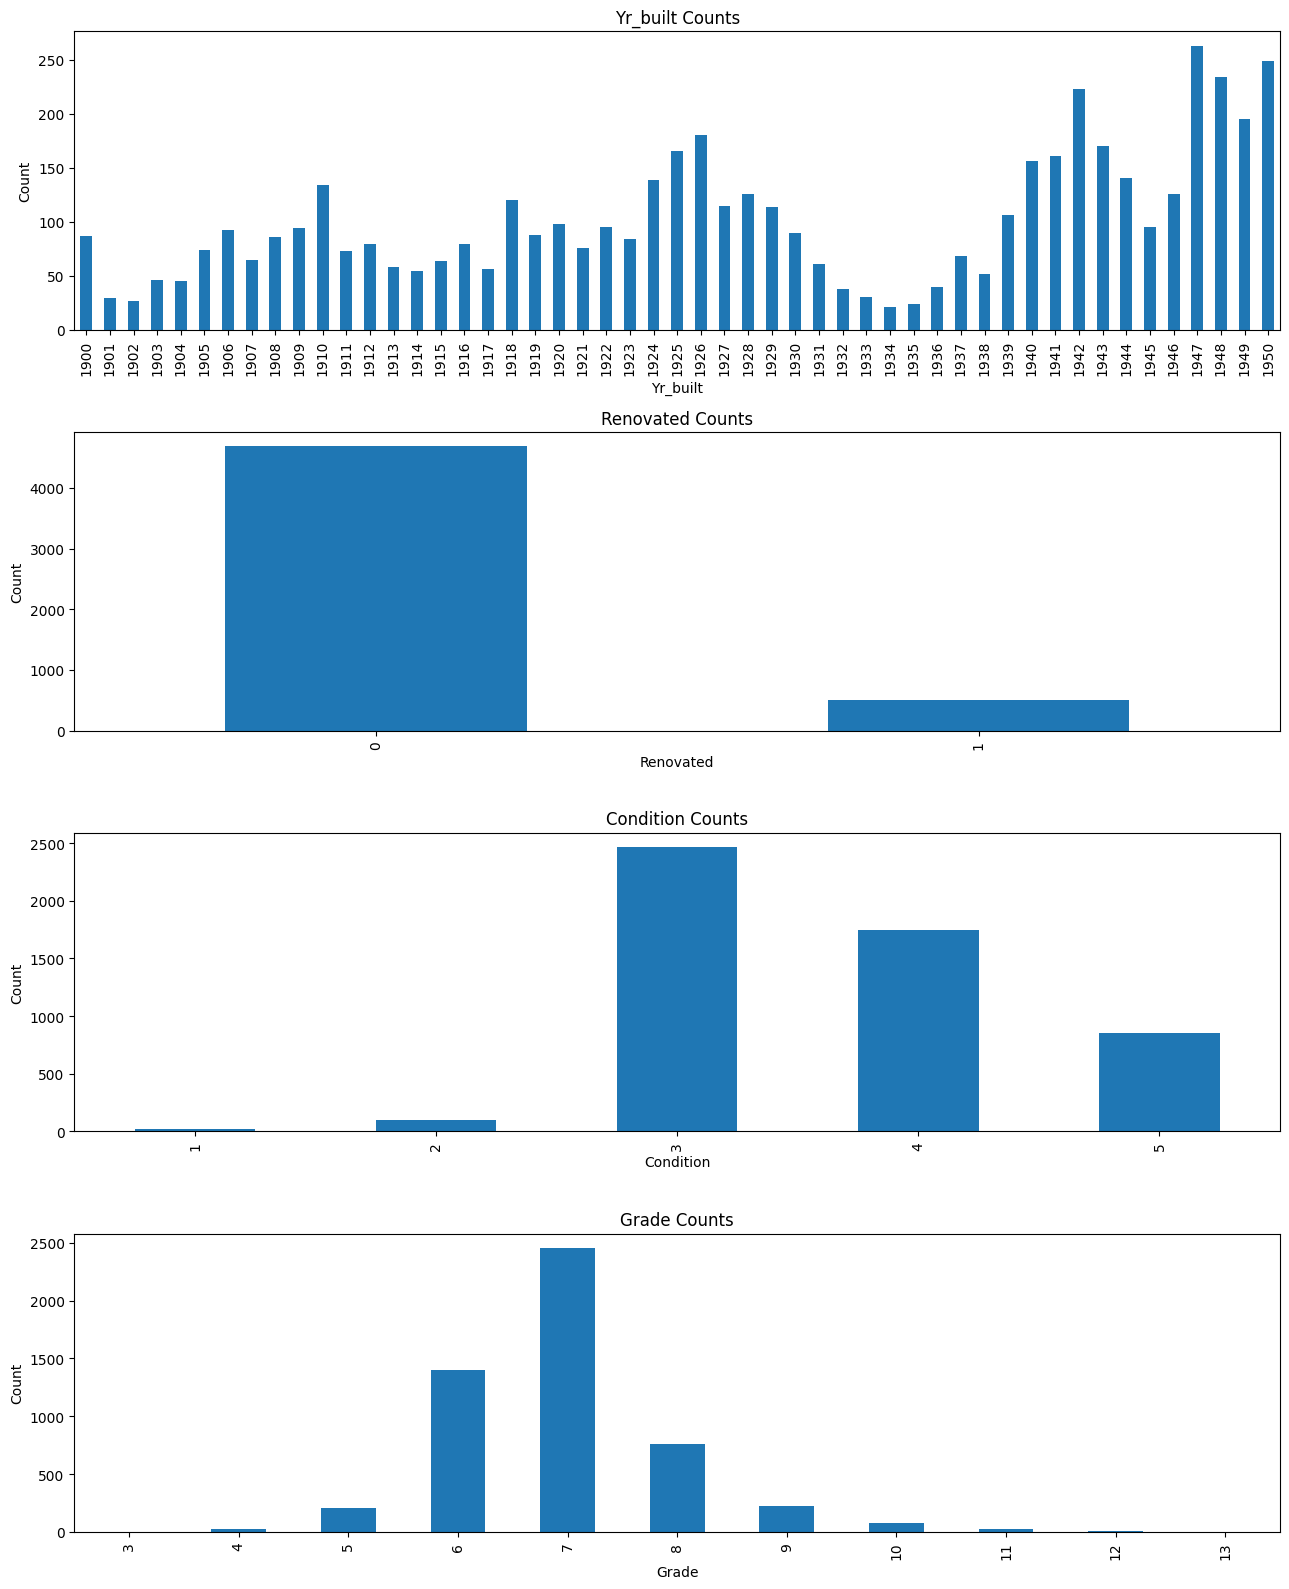

In [17]:
# plot the counts of categorial features

# Create a subplot grid
fig, axes = plt.subplots(nrows=len(categorical_features), figsize=(13, len(categorical_features) * 4))

# Iterate over each categorical feature
for feature, ax in zip(categorical_features, axes):
    # Count occurrences of each category
    category_counts = df_historical[feature].value_counts()
    
    # Sort categories by their values in ascending order
    category_counts_sorted = category_counts.sort_index()
    
    # Plot the counts
    category_counts_sorted.plot(kind='bar', ax=ax)
    
    # Set title and labels
    ax.set_title(f"{feature.capitalize()} Counts")
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

### 1. Historical Houses Premium Hypothesis:

Historical houses were the first which were build into the city, therefore they are mostly central and have premium prices due to the low distance to the city center
Most of them could be in a bad condition because of their age and need to be renovated soon 

- historical houses are in a solid condition compared due to their age
- they also have solid grades  
- no need for a quick renovation

### But lets see if we can make a high profit when we renovate them and sell them  - lets proof our last Hypothesis



- Most of the historical houses are not renovated yet - this would be a huge resell opportunity for our stakeholder, if the few historical houses that were renovated have significant higher prices compared to not renovated historical houses

- the number of houses built seem to rise a bit after world war 2 ended 

- most of the historical houses are in conditions 3 or 4 and in a solid grade range

lets find out, if renovated historical houses have higher sale prices than non renovated ones

In [18]:
# Average Sale Prices for renovated historical houses vs. not renovated historical houses

# Calculate mean price for renovated and not renovated houses
mean_price_renovated = df_historical[df_historical['renovated'] == 1]['price'].mean().round(2)
mean_price_not_renovated = df_historical[df_historical['renovated'] == 0]['price'].mean().round(2)

print("Mean Price of Renovated Historical Houses:", mean_price_renovated)
print("Mean Price of Not Renovated Historical Houses:", mean_price_not_renovated)

Mean Price of Renovated Historical Houses: 731686.38
Mean Price of Not Renovated Historical Houses: 524285.07


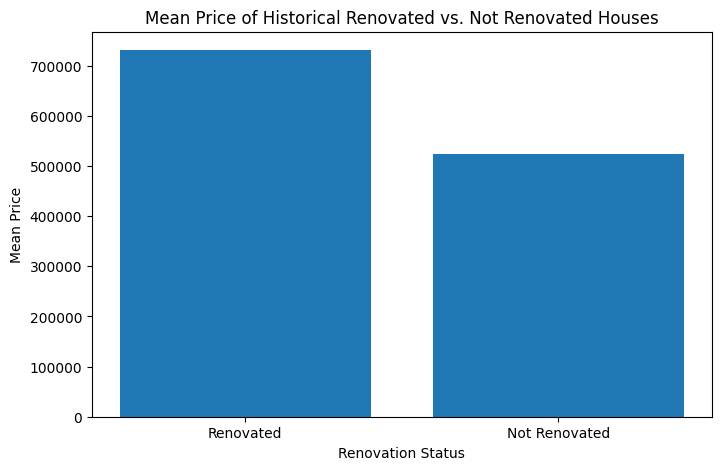

In [19]:
# Plot the Mean prices for the Historical houses renovated and not renovated
# Calculate Mean price for renovated and not renovated houses
median_price_renovated = df_historical[df_historical['renovated'] == True]['price'].mean()
median_price_not_renovated = df_historical[df_historical['renovated'] == False]['price'].mean()

# Plotting
plt.bar(['Renovated', 'Not Renovated'], [median_price_renovated, median_price_not_renovated])
plt.xlabel('Renovation Status')
plt.ylabel('Mean Price')
plt.title('Mean Price of Historical Renovated vs. Not Renovated Houses')
plt.show()

### 3. Renovation Impact on Profitability Hypothesis
Renovations let the house price skyrocket - especially when they were old houses in good neighborhoods (profability over renovation costs, is it worth to renovate)

As we saw, renovations have a huge impact on the prices of historical houses

Mean Price of Renovated Historical Houses: 731686.38

Mean Price of Not Renovated Historical Houses: 524285.07

Therefore the Average Profit per renovated house could be over 200.000$  
if we keep the renovation costs lower than that, we could end up with a profit 


### Thank you for reviewing my EDA Notebook with some Basic Tasks to pre analyze data before going into deeper analysis 

 Please keep in mind, that this is just a showcase project and the stakeholder i took, has not the best requirements and variables for this dataset. This should just proof some kind of knowledge in EDA- Projects
 read the "More work to do" list, what i could achieved, when having more time for this project :)

now, that we know a bit more about historical houses in King County we could generate a first guess for our stakeholder, which houses to have a look on
since renovations bring lots of profits and the most historical houses are still not renovated.

therefore, before going into deeper analysis we could generate a dataframe for our potential stakeholder

- df_recommendations = df_historical.query("price < 500.000 and renovated != 1")

### But there is lots of work more to do!!! This is a short list of Work, what i could additionally do, to get more precise results. 
- Eliminate Outliers of the price table for renovated and unrenovated historical houses and do my plots again
- categorise historical houses on other variables like house_size, floors etc., and make the same tasks again for historical houses in each house size category, with this we could identify if there are house sizes, where a renovation of an historical house brings more profit than in other house size categories
- make some correlation plots and identify other variables in my dataset, which correlate with house price like size of the lot, size of the house etc.
- make a features list with highly correlated features 

## Where i would resume my project Work, when i had more time analyzing the data

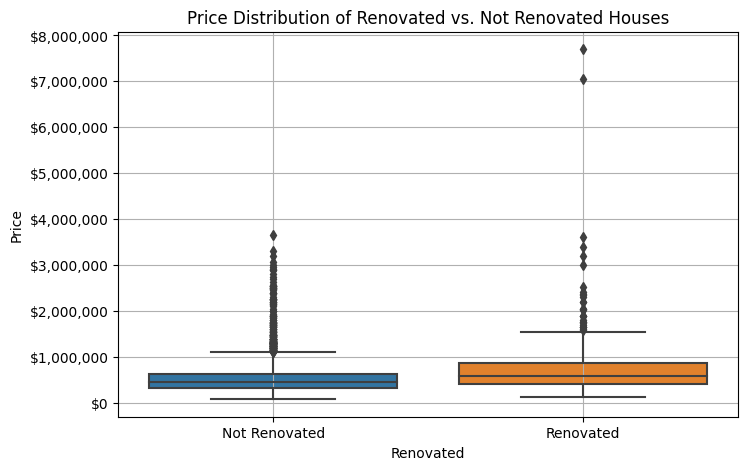

In [20]:
# where i would resume my work, when working further on the project
# identify outliers in my boxplot and remove them from dataset and do the EDA Cycle again for more precise results

# Create the boxplot
sns.boxplot(data=df_historical, x='renovated', y='price')

# Set title and labels
plt.title('Price Distribution of Renovated vs. Not Renovated Houses')
plt.xlabel('Renovated')
plt.ylabel('Price')

# Set x-axis ticks
plt.xticks(ticks=[0, 1], labels=['Not Renovated', 'Renovated'])

# Format y-axis ticks to display prices in whole values
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

# Show grid
plt.grid(True)

# Show plot
plt.show()

In [ ]:
-